In [8]:
# installs
! pip install spacy
! pip install nltk
! pip install scikit-plot
! pip install umap-learn
! pip install afinn
! pip install textblob
! pip install seaborn
! pip install gensim
! pip install langdetect


  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76570 sha256=04507b24f4a8a5541dd0a425120acd9e0748b83ccf95fe991aa18016689075d9
  Stored in directory: c:\users\tiam moradi\appdata\local\pip\cache\wheels\a5\92\db\cdb3f2ea85624c17bddbbc25f0e2d1a996e26d806ff505eed6
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52366 sha256=ec2f11801ea81014cfb90682521b6351370702ec27f03ee6c0bb3d73f449cdfd
  Stored in directory: c:\users\tiam moradi\appdata\local\pip\cache\wheels\e0\b4\fc\31abe24c9f22c4f08d3c1f92898f35f47a20a2da6fba2560ca
Successfully built umap-learn pynndescent


In [1]:
import datetime 
from dateutil.relativedelta import *
import os
import re 
import string
import nltk
import pandas as pd 
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')
import nltk
nltk.download('wordnet')

import matplotlib.pyplot as plt 

from collections import OrderedDict
import langdetect 
from langdetect import DetectorFactory , detect_langs # for dermining language  
DetectorFactory.seed = 0

#from google_trans_new import google_translator  # translating words
#translator = google_translator()  

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation


from wordcloud import WordCloud 
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Tiam
[nltk_data]     Moradi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tiam
[nltk_data]     Moradi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Import

In [2]:
csv = pd.read_csv("Groupon_SamsClub.csv")
sams = pd.DataFrame(csv)
sams.head()


,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33


In [3]:
sams = sams.astype('string').fillna('')

In [4]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

In [5]:
DetectorFactory.seed = 0

In [6]:
languages = []


for ii in tqdm(range(0,len(sams))):
    # split by space into list, take the first x intex, join with space
    text = sams.iloc[ii]['text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        
        except Exception as e:
           lang = "unknown"
                
            
           
    
      
    languages.append(lang)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 28540/28540 [02:00<00:00, 235.97it/s]


# Tokenization

In [9]:
# Package import
import string
import spacy.cli 
from spacy.lang.en import English
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
parser = English()
punctuations = string.punctuation

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
sams

,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33
...,...,...,...,...,...,...,...,...
28535,Susan,Love this store! Always find great deals at SA...,5,0,0,1,11/10/2013,04/07/2021 11:11:22
28536,Michael,The deal was great. With the food vouchers and...,5,0,0,0,11/10/2013,04/07/2021 11:11:22
28537,Pedro,Job we'll done Sam beautiful people,5,0,0,0,11/09/2013,04/07/2021 11:11:22
28538,Teresa,Bought this for my son,5,0,0,0,11/09/2013,04/07/2021 11:11:22


In [11]:
#Tokenization
sams['token'] =sams['text'].apply(lambda x:nlp(x))
spacy_token = sams.token

In [12]:
stopwords = list(STOP_WORDS)

In [13]:
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [14]:
# Remove stopwords
sams['without_stopwords'] = sams['text'].apply(my_tokenizer).agg(lambda x: ','.join(map(str,x)))
sams.without_stopwords

0         
1         
2         
3         
4         
        ..
28535     
28536     
28537     
28538     
28539     
Name: without_stopwords, Length: 28540, dtype: object

### Lemmatization

In [15]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package punkt to C:\Users\Tiam
[nltk_data]     Moradi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tiam Moradi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to C:\Users\Tiam
[nltk_data]     Moradi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Lemmatizing
sams['Lemmatize'] = sams['without_stopwords'].apply(lambda x: lemmatize_sentence(x))
sams.Lemmatize

0         
1         
2         
3         
4         
        ..
28535     
28536     
28537     
28538     
28539     
Name: Lemmatize, Length: 28540, dtype: object

In [17]:
sams.head()

,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped,token,without_stopwords,Lemmatize
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33,"(I, have, not, received, my, card, yet)",,
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33,"(This, is, such, a, good, deal, on, a, members...",,
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33,"(The, Sam, 's, Membership, process, via, disco...",,
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33,"(Good, deals)",,
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33,"(Just, left, Sam, ’s, WITHOUT, my, membership,...",,


# Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [21]:
text = sams['text'].values
max_features = 2**12

X = vectorize(text, max_features)

# Reduce Dimensionality by applying T-SNE

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50,random_state=123)  
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 28540 samples in 0.003s...
[t-SNE] Computed neighbors for 28540 samples in 25.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28540
[t-SNE] Computed conditional probabilities for sample 2000 / 28540
[t-SNE] Computed conditional probabilities for sample 3000 / 28540
[t-SNE] Computed conditional probabilities for sample 4000 / 28540
[t-SNE] Computed conditional probabilities for sample 5000 / 28540
[t-SNE] Computed conditional probabilities for sample 6000 / 28540
[t-SNE] Computed conditional probabilities for sample 7000 / 28540
[t-SNE] Computed conditional probabilities for sample 8000 / 28540
[t-SNE] Computed conditional probabilities for sample 9000 / 28540
[t-SNE] Computed conditional probabilities for sample 10000 / 28540
[t-SNE] Computed conditional probabilities for sample 11000 / 28540
[t-SNE] Computed conditional probabilities for sample 12000 / 28540
[t-SNE] Computed conditional probabilities for s

In [ ]:
X_embedded

# Determining Clusters

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

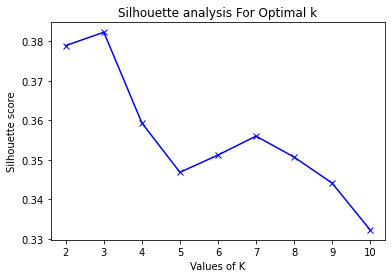

In [29]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_embedded)
    cluster_labels = kmeans.labels_
 # silhouette score
    silhouette_avg.append(silhouette_score(X_embedded, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [32]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_embedded)

In [33]:
# KMeans Clustering
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_embedded)


In [ ]:
len(X_embedded)

In [34]:
sams['clusters'] = y_pred

In [ ]:
sams.loc[sams['clusters']==5]
#将这些clusters当作 tiam的 rating来进行 topic modelling，然后再在scatterplot中label上相应的名称即可

In [35]:
cluster_1 = sams.loc[sams['clusters']==1]
cluster_2 = sams.loc[sams['clusters']==2]
cluster_3 = sams.loc[sams['clusters']==3]
cluster_4 = sams.loc[sams['clusters']==4]
cluster_5 = sams.loc[sams['clusters']==5]
cluster_6 = sams.loc[sams['clusters']==6]
cluster_0 = sams.loc[sams['clusters']==0]

In [ ]:
cluster_0

In [ ]:
!pip install --upgrade matplotlib

C:\Users\Tiam Moradi\anaconda3\envs\loseit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


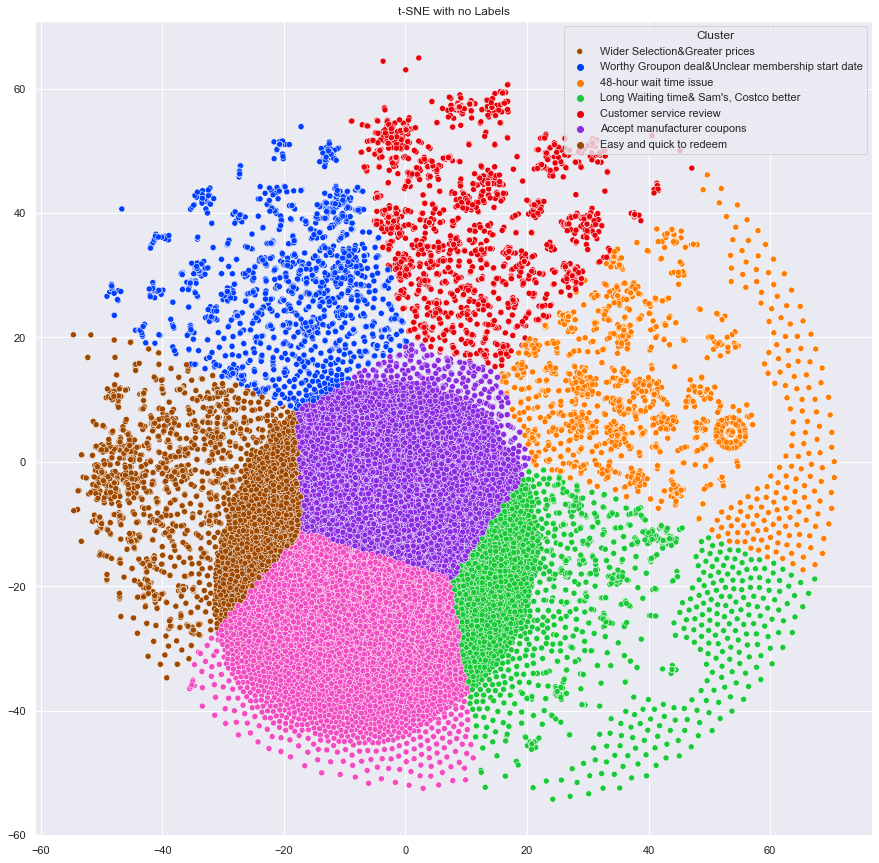

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# plot
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = y_pred, palette= 'bright')

plt.legend(title='Cluster', loc='upper right', labels=['Wider Selection&Greater prices', 'Worthy Groupon deal&Unclear membership start date','48-hour wait time issue',"Long Waiting time& Sam's, Costco better",'Customer service review','Accept manufacturer coupons','Easy and quick to redeem'])


plt.title('t-SNE with no Labels')
plt.show(g)

# Topic Modelling

### Function

In [37]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

def ngrams_and_topic_modeling(df,cluster,return_tfidf = False):
    ''' Here we are going to make a function that print out the topics and the ngrams 
        of a given model based on 
    '''
    # Here we are going to be initializing the vectorizers 
    tfidf_ngram = TfidfVectorizer(max_features=50,ngram_range=(3,5),stop_words='english')
    tfidf_lda = TfidfVectorizer(max_features=50,stop_words='english')
    
    # Here we are going to be creating our df by review rating score 
    df_score = df.loc[df['clusters'] ==cluster,'without_stopwords']
    df_score_copy = df_score.copy(deep=True)
    
    df_score_transformed = tfidf_ngram.fit_transform(df_score)
    df_score_copy_transformed = tfidf_lda.fit_transform(df_score_copy)

    # getting ngrams and sorting in descending order
    tfidf_series = pd.Series(tfidf_ngram.vocabulary_)
    tfidf_series=tfidf_series.to_frame()
    tfidf_series['n-gram'] = tfidf_series.index
    tfidf_series.index = range(len(tfidf_series.index))
    tfidf_series.rename({0:'value_count'},axis=1,inplace=True)

    top_n_grams = tfidf_series.loc[~tfidf_series['n-gram'].str.contains('google')].sort_values('n-gram',ascending = False)
    print('done with ngrams')
    print('starting lda...')
    # Next we are going to do the Topic Modelling.
#     search_params = {'n_components': list(range(3,8)), 'learning_decay': [.5, .7, .9],'random_state':[23]}
    lda = LatentDirichletAllocation(n_components=3,learning_decay=.5,random_state=23)
#     grid = GridSearchCV(lda,param_grid=search_params,n_jobs=3)
    
    lda.fit(df_score_copy_transformed)
    
    tfidf_lda = pd.DataFrame(df_score_copy_transformed.toarray(),columns=tfidf_lda.get_feature_names())
    topics = display_topics(lda,tfidf_lda.columns,10)
    
    return top_n_grams , topics


def preprocessing_text(df):
    '''
    Here we are going to clean the text to be in a good format for further analysis 
    
    input: df ; DataFrame object that contains all of the reviews. 
    '''  
    lemm = WordNetLemmatizer()
    df = df.loc[~df.caption.isnull()] # here we are going to only process reviews 
    
    df.caption =  df.caption.apply(lambda review: clean_translated_reviews(review) if 'Google' in review else review)
        
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(str.lower)
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: re.sub(r'[^\w\s]','',review)) # removes punctuation
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: re.sub('\([^()]*\)','',review)) # removes words within parenthesis 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: emoji_pattern.sub(r'', review)) 
    df.loc[:,'caption_split'] = df.loc[:,'caption'].apply(lambda review: review.split(' '))
    
    clean_reviews = []
    for review_idx , review in df.caption_split.items():
        temp = []
        for idx, word in enumerate(review):
            if word in stop_words:
                continue
            else:
                temp.append(lemm.lemmatize(word))
        
        review_  = ' '.join(temp)
        clean_reviews.append(review_)
    
    df.loc[:,'caption'] = clean_reviews
    #df.drop(['Unnamed: 0'],axis=1,inplace=True)
    

    return df

## **Topic 1-7**

In [38]:
sams.rename(columns={'text':'caption'},inplace=True)
sams = preprocessing_text(sams)

NameError: name 'clean_translated_reviews' is not defined

#### **TOPIC 1**
1. Wider selection of items
2. Great prices

**Sample reviews**
- "The lady at customer service was very friendly and thanked me for joining BJ's. I actually have a membership at Sam's as well but I like BJ's much better because of a wider selection of items." - Patricia
- "Great price for membership, easy to sign up and BJ’s has great prices and friendly staff!!!" --- Kelly

In [39]:
ngrams_sams_0, topics_0 = ngrams_and_topic_modeling(sams, cluster = 0)
topics_0

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
ngrams_sams_0

#### **TOPIC 2**
1. Groupon deal of BJ's is worthy
2. The membership start date is unclear 

**Example reviews:**
- "It was a great deal. A year membership and a 25.00 gift card. It was like getting a year membership for $10.00"
- "sams is not honoring membership start date from when we actually sign up for membership. It starts the membership when we bought the Groupon, which is absurd as I will lose 2-3 months of membership as I redeemed my Groupon sometime in March. I will never recommend sams to anyone due to this fraud."
- "I would warn people who purchase this that the membership starts once you pay for the groupon and not when you redeem the voucher in the store. The information was very sketchy and the date the groupon expiration date on the groupon only reflects the promotional value expiration date. I brought this in December but did not redeem or activate the membership..."

In [40]:
ngrams_sams_1, topics_1 = ngrams_and_topic_modeling(sams, cluster = 1)
topics_1

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
ngrams_sams_1

### **TOPIC 3**
1. Wait 48 hours after redeeming before activating the membership
**Sample reviews**
- "Read the fine print for this Groupon. You have to wait 48 hours to use it. For this year a $25 membership is worth it for me, because the BJ's in DE sell gas and propane. I have been a Costco member for years, and after doing comparison shopping, I still prefer Costco. Thus far, Costco offers better products and prices. Additionally, Costco has more organic and gluten free products." --- Jenifer
- "The customer service was terrible. The membership associate rudely explained to us that we would have to wait 48 hours after redeeming the Groupon voucher before we could use the membership. We also had to wait approximately 10 minutes in line." --- Rachel


In [ ]:
ngrams_sams_2, topics_2 = ngrams_and_topic_modeling(sams, cluster = 2)
topics_2

In [ ]:
ngrams_sams_2

### **TOPIC 4**
1. Long waiting line & customer service time
2. Prices higher than Sam's (93 reviews)
3. Like Costco better (29 reviews)
4. Good place to buy in bulk

**Sample reviews**
- "Very long waiting line to get my membership. They told me that my membership is valid from the date I got the Groupon not from the date I got the membership at sams even though it states that on the Groupon website." --- Sania
- "Sams club has lower prices so they should lower to competitive price that they are a little expensive" --- Jackie
- "Always out of things that I need such as vegetables and fruit. Poor customer service at the desk. It's definitely not Costco!" --- Meryl
- "Enjoyed shopping there good buys on bulk items" --- Dorothy

In [ ]:
ngrams_sams_3, topics_3 = ngrams_and_topic_modeling(sams, cluster = 3)
topics_3

In [ ]:
ngrams_sams_3

### **TOPIC 5**
1. Customer service reviews (Negative: 191 | Positive: 737)

**Sample reviews**
- "Friendly staff and amazing service!"  --- Tim
- "Poor customer service. No check out assistance. Only 1 person on duty for checking out at Christmas. Very bad." --- Gayle
- "This Groupon states that a $55 coupon book is included, but I did not receive it. The customer service at the membership desk was poor. The representative did not speak to me the whole time I was there. He just handed me my card when he was done. When I said thank you he didn't respond. I gave it a three because the selection and prices in the store are good." --- Karen

In [ ]:
ngrams_sams_4, topics_4 = ngrams_and_topic_modeling(sams, cluster = 4)
topics_4

In [ ]:
ngrams_sams_4

In [ ]:
# Measure negative reviews
neg_review_4 = ngrams_sams_4[ngrams_sams_4['n-gram'].str.contains("worst|terrible|poor|slow")]
print("Negative review count: "+ str(neg_review_4.value_count.sum()))

In [ ]:
# Measure positive reviews
pos_review_4 = ngrams_sams_4[ngrams_sams_4['n-gram'].str.contains("good|friendly|great|helpful|care|wonderful")]
print("Positive review count: "+ str(pos_review_4.value_count.sum()))

### **TOPIC 6**
1. Accept manufacture coupon is a highlight
2. Coupons saved a lot of money

**Sample Reviews**
- "We love BJ's. they have more brands that we use, & accept manufacturer coupons." --- Stacy
- "Always check out their coupons, I usually find a couple to help save some money." --- Patricia

In [ ]:
ngrams_sams_5, topics_5 = ngrams_and_topic_modeling(sams, cluster = 5)
topics_5

In [ ]:
ngrams_sams_5

#### **TOPIC 7**
- BJ's Groupons are easy to use and quick to redeem

**Sample reviews**
- "Easy to use my Groupon! Lots of great things at BJ's from discount gas to food buying in bulk! And many other great things as well. Definitely 👍!" --- Doris
- "It was very easy to redeem my Groupon voucher. Great deal." --- Kelly

In [ ]:
ngrams_sams_6, topics_6 = ngrams_and_topic_modeling(sams, cluster = 6)
topics_6

In [ ]:
ngrams_sams_6